In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
data = pd.read_csv("A_Z Handwritten Data.csv")

In [4]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(372450, 785)

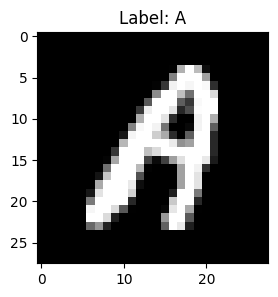

In [6]:
# Display character A
first_row = data.iloc[0]
label = first_row.iloc[0]
image_data = first_row.iloc[1:].values

# Reshape the pixel data to 28x28 matrix format
image = image_data.reshape((28, 28))

# Display the image
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')
plt.title(f"Label: {chr(label + ord('A'))}")  # Convert label number to letter
plt.show()

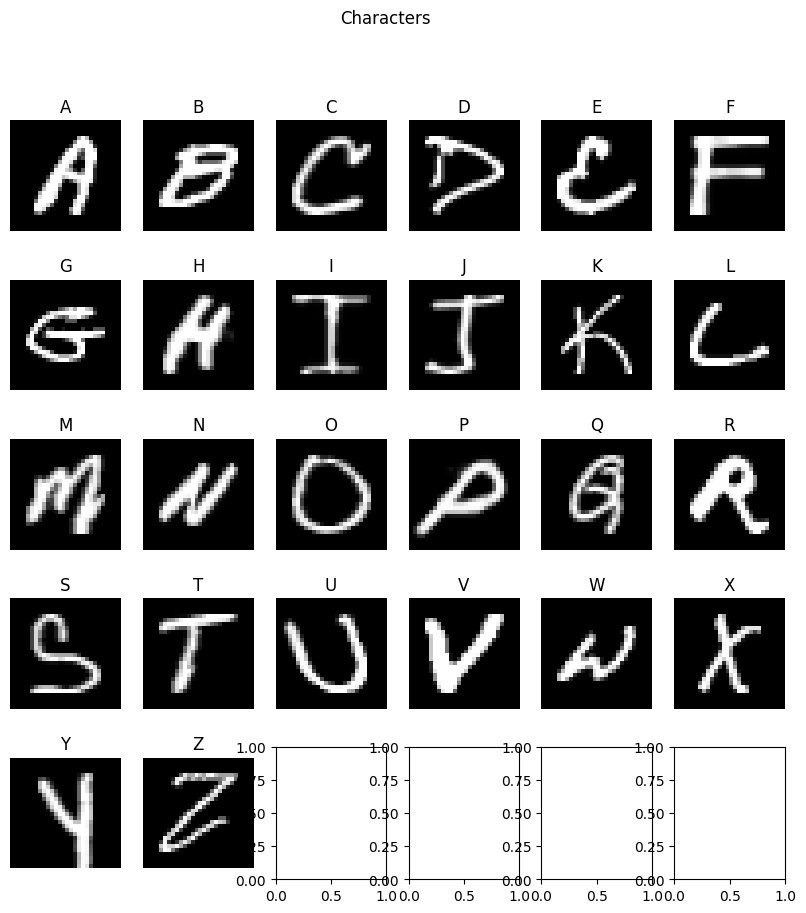

In [7]:
# Display an image for every character (A - Z)
fig, axes = plt.subplots(5, 6, figsize=(10, 10))
fig.suptitle("Characters")

for label in range(26):
    label_column = data.iloc[:, 0]
    mask = label_column == label
    filtered_data = data[mask]
    pixels = filtered_data.iloc[0, 1:]
    character_data = pixels.values
    image = character_data.reshape((28, 28))

    row, col = divmod(label, 6)

    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(chr(label + ord('A')))
    axes[row, col].axis('off')

plt.show()

In [8]:
# Display a table to show the number of images for each character
label_counts = data.iloc[:, 0].value_counts().sort_index()

table = pd.DataFrame({
    'Character': [chr(label + 65) for label in label_counts.index],  # Convert label index to letters (A-Z)
    'Images': label_counts.values
})

table.set_index('Character', inplace=True)

print(table)

           Images
Character        
A           13869
B            8668
C           23409
D           10134
E           11440
F            1163
G            5762
H            7218
I            1120
J            8493
K            5603
L           11586
M           12336
N           19010
O           57825
P           19341
Q            5812
R           11566
S           48419
T           22495
U           29008
V            4182
W           10784
X            6272
Y           10859
Z            6076


In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split as train_test_split

In [10]:
#Split dataset into training and testing data
data_array = data.to_numpy()
labels = data_array[:, 0]
images = data_array[:, 1:].reshape(-1, 28, 28) / 255

# 80% of images used for training, 10% used for validation, 10% used for testing
train_images, temp_images, train_labels, temp_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)

print(train_images.shape, val_images.shape, test_images.shape)

(297960, 28, 28) (37245, 28, 28) (37245, 28, 28)


In [11]:
# Define neural network model
my_model = tf.keras.models.Sequential()
my_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
my_model.add(tf.keras.layers.Dense(128,activation='relu'))
# A - Z = 26 classes
my_model.add(tf.keras.layers.Dense(26, activation='softmax'))

# Compile the model
my_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
my_model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))

C:\Users\Apoorva\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 63s 6ms/step - accuracy: 0.8736 - loss: 0.4692 - val_accuracy: 0.9602 - val_loss: 0.1435
Epoch 2/3
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 59s 6ms/step - accuracy: 0.9631 - loss: 0.1306 - val_accuracy: 0.9682 - val_loss: 0.1155
Epoch 3/3
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 57s 6ms/step - accuracy: 0.9724 - loss: 0.0969 - val_accuracy: 0.9709 - val_loss: 0.1062


In [12]:
# Check model accuracy on test data
val_loss, val_acc = my_model.evaluate(test_images, test_labels)
print('Test accuracy', val_acc)

1164/1164 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9735 - loss: 0.0891
Test accuracy 0.9728822708129883


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


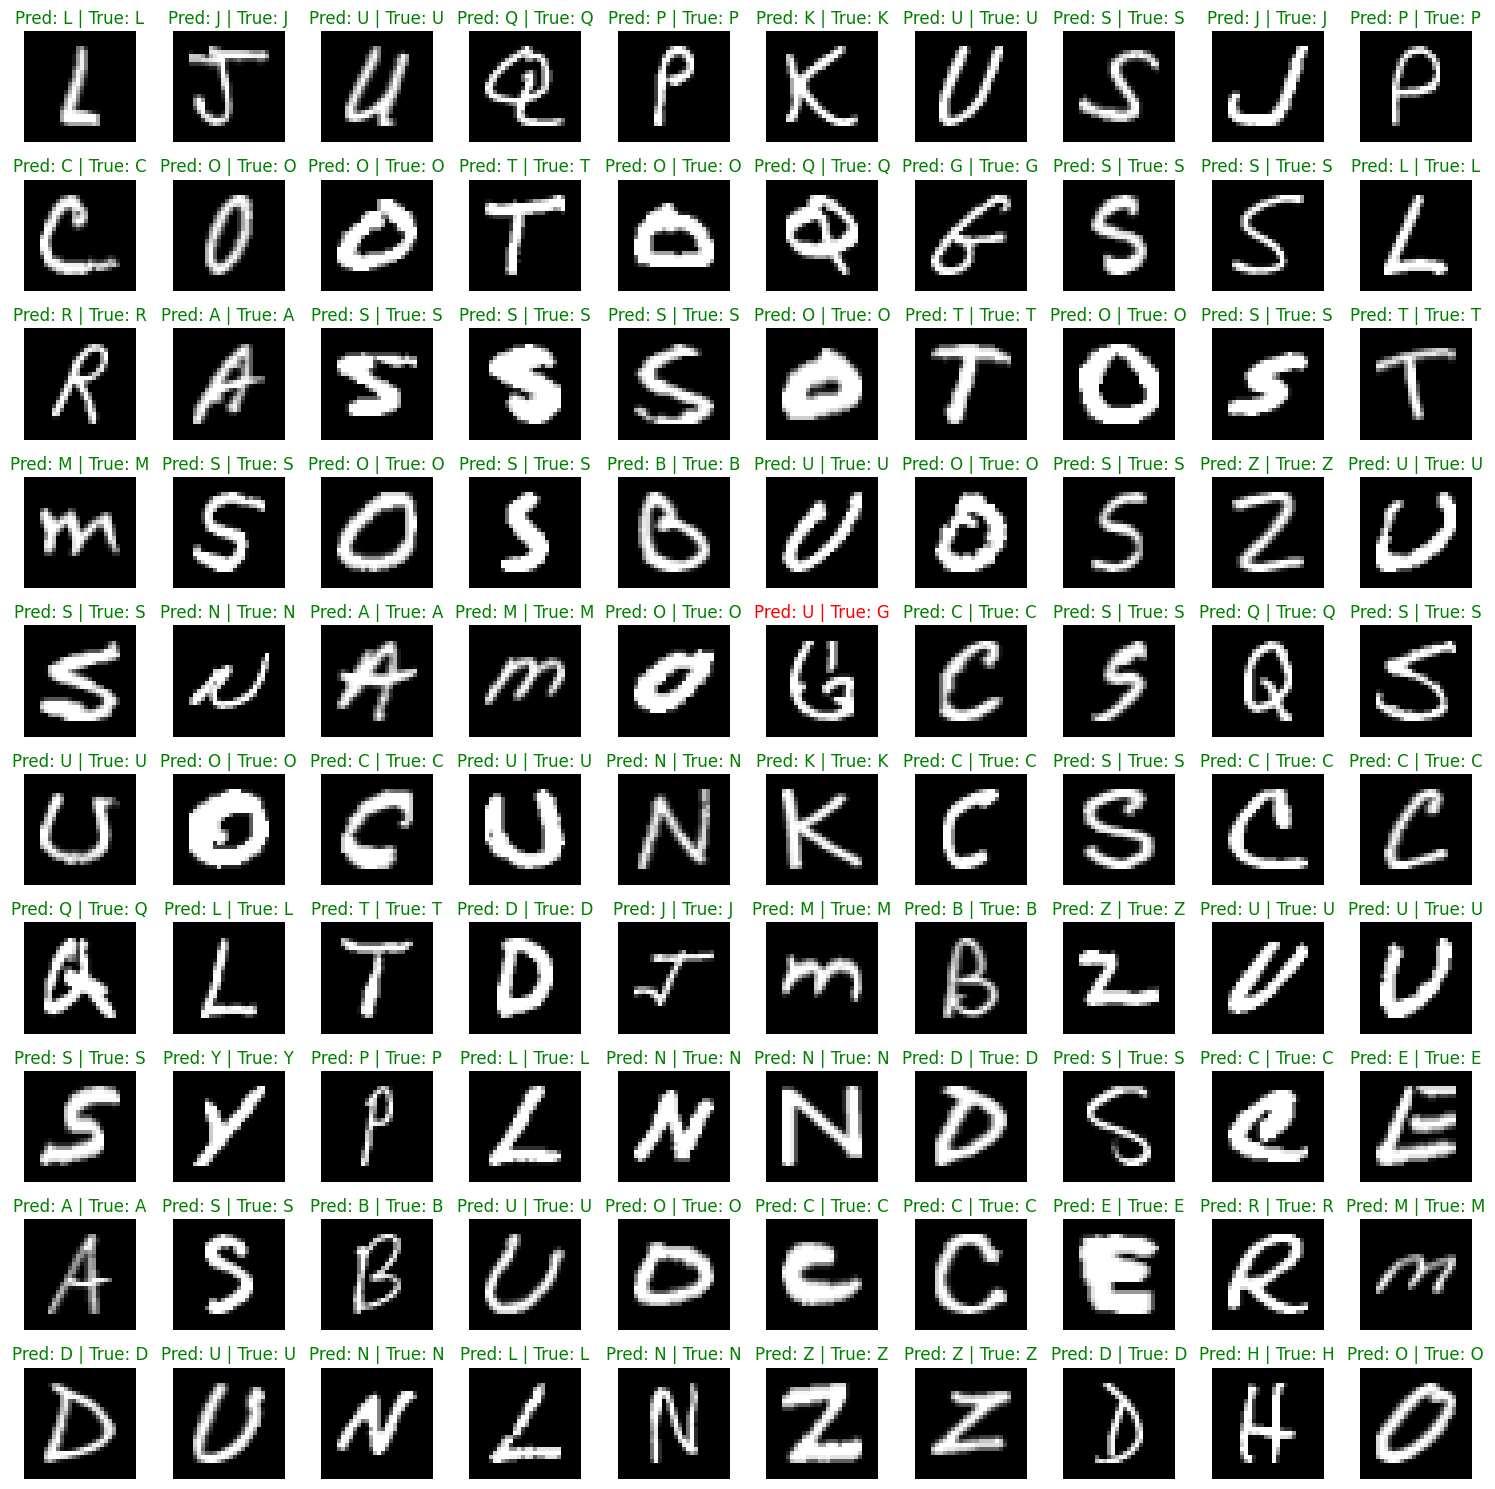

In [13]:
char_labels = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

num_images = 100  # Number of images to display
test_images_subset = test_images[:num_images]
predictions = my_model.predict(test_images_subset)
predicted_labels = np.argmax(predictions, axis=1) # Returns an array of indexs that have the max val


fig, axes = plt.subplots(10, 10, figsize=(15, 15))
axes = axes.ravel()

for i in range(num_images):
    ax = axes[i]
    ax.imshow(test_images[i], cmap='gray')
    
    predicted_char = char_labels[predicted_labels[i]]
    true_char = char_labels[test_labels[i]]
    
    if predicted_char == true_char:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
        
    
    ax.set_title(f"Pred: {predicted_char} | True: {true_char}", color=color)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [14]:
import cv2

In [15]:
# Given an image of characters, predict each character.
def predict_Characters(characters):
    char_labels = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    predictions = []
    characters_batch = np.stack(characters)
    model_predictions  = my_model.predict(characters_batch)
    predicted_labels = np.argmax(model_predictions, axis=1)
    
    for labels in predicted_labels:
        predicted_char = char_labels[labels]
        predictions.append(predicted_char)
       
    print(predictions)

In [17]:
# Preprocess an image, segment characters using connected component labeling, and sort characters left-to-right.
def preprocess_and_segment_image(filepath):
    image = cv2.imread(filepath)

    # Display the original image of my handwriting
    plt.figure(figsize=(8, 8))
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
    
    # Apply adaptive threshold. (Regular threshold doesn't work as well.)
    binary_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 41, 25)
    
    # Apply connected component labeling (from hw2)
    num_labels, labels_im = cv2.connectedComponents(binary_image, connectivity=8)

    characters = []
    bounding_boxes = []

    for label in range(1, num_labels):
        mask = (labels_im == label).astype(np.uint8) * 255

        # https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html 
        x, y, w, h = cv2.boundingRect(mask)

        if w < 10 or h < 10: # Ignore noise. (Like dust on paper. See michelle-handwriting dataset)
            continue
       
        character = binary_image[y:y+h, x:x+w]
        resized_character = cv2.resize(character, (18, 18))
        padded_character = np.pad(resized_character, ((5, 5), (5, 5)), mode='constant', constant_values=0)
        characters.append(padded_character)
        bounding_boxes.append((x, y, w, h))

    combined = list(zip(bounding_boxes, characters))
    sorted_combined = sorted(combined, key=lambda item: item[0][0])
    sorted_characters = [item[1] for item in sorted_combined]

    fig, axs = plt.subplots(1, len(sorted_characters), figsize=(15, 5))
    for i, char_img in enumerate(sorted_characters):
        axs[i].imshow(char_img, cmap='gray')
        axs[i].axis('off')
    plt.show()

    return sorted_characters

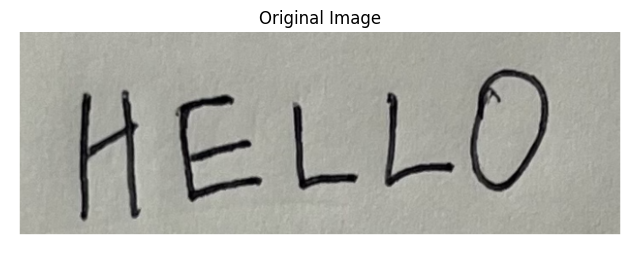

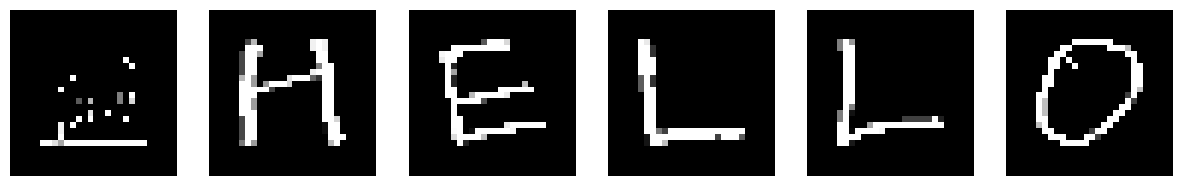

In [20]:
test1 = preprocess_and_segment_image('hello.png')

In [21]:
predict_Characters(test1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
['L', 'N', 'E', 'L', 'L', 'O']


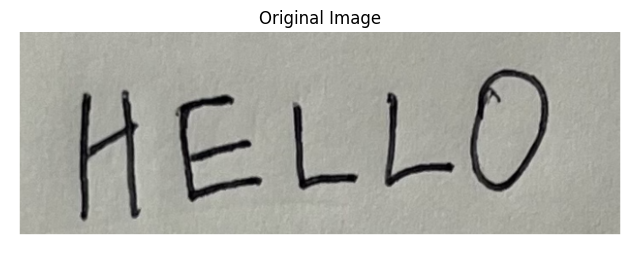

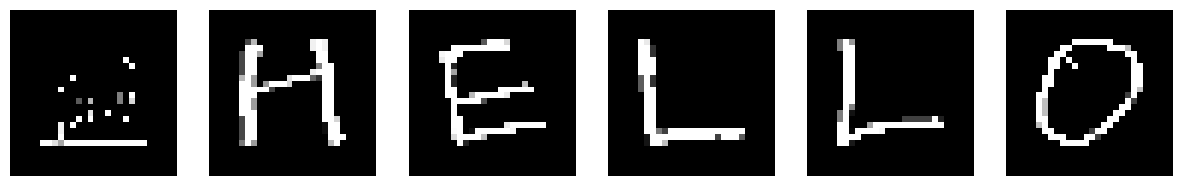

In [22]:
test2 = preprocess_and_segment_image("hello.png")